In [16]:
Sys.time()

[1] "2021-01-09 19:40:16 IST"

In [17]:
Name <- "Name : Ramesh Bhutka"
sapID <-"Sap ID:- 53004190003"
Name; sapID

[1] "Name : Ramesh Bhutka"

[1] "Sap ID:- 53004190003"

In [1]:
#install.packages('corrgram')
# dplyr is used for data manipulation 
library(dplyr)
# ggplot2 for visualization 
library(ggplot2)
#caTools for train/test split
library(caTools)
# corrgram for making neat correlation matrix plots
library(corrgram)



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [2]:
df <- read.csv('https://raw.githubusercontent.com/Ramesh-Bhutka/linear-regression-with-R/main/Fish.csv')
head(df)

,ï..Species,Weight,Length1,Length2,Length3,Height,Width
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Bream,242,23.2,25.4,30.0,11.5200,4.0200
2,Bream,290,24.0,26.3,31.2,12.4800,4.3056
3,Bream,340,23.9,26.5,31.1,12.3778,4.6961
4,Bream,363,26.3,29.0,33.5,12.7300,4.4555
5,Bream,430,26.5,29.0,34.0,12.4440,5.1340
6,Bream,450,26.8,29.7,34.7,13.6024,4.9274


In [3]:
any(is.na(df))

[1] FALSE

In [4]:
df <- df %>% 
  rename(
    Species = ï..Species,
    )

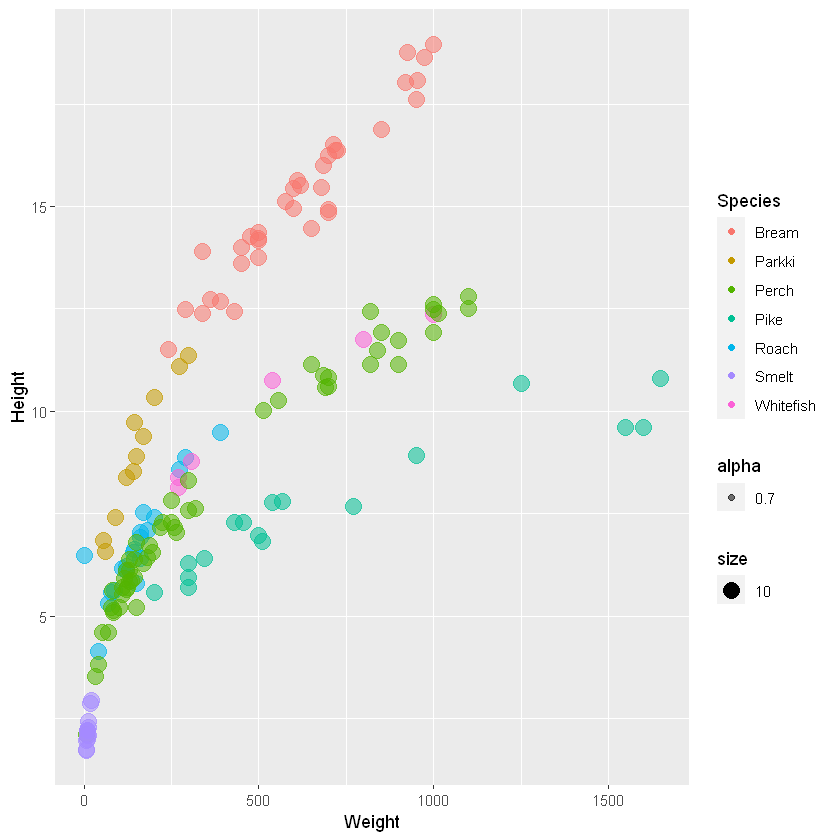

In [5]:
ggplot(data=df, aes(x=Weight, y=Height)) +
geom_point(aes(color=Species, size=10, alpha=0.7))

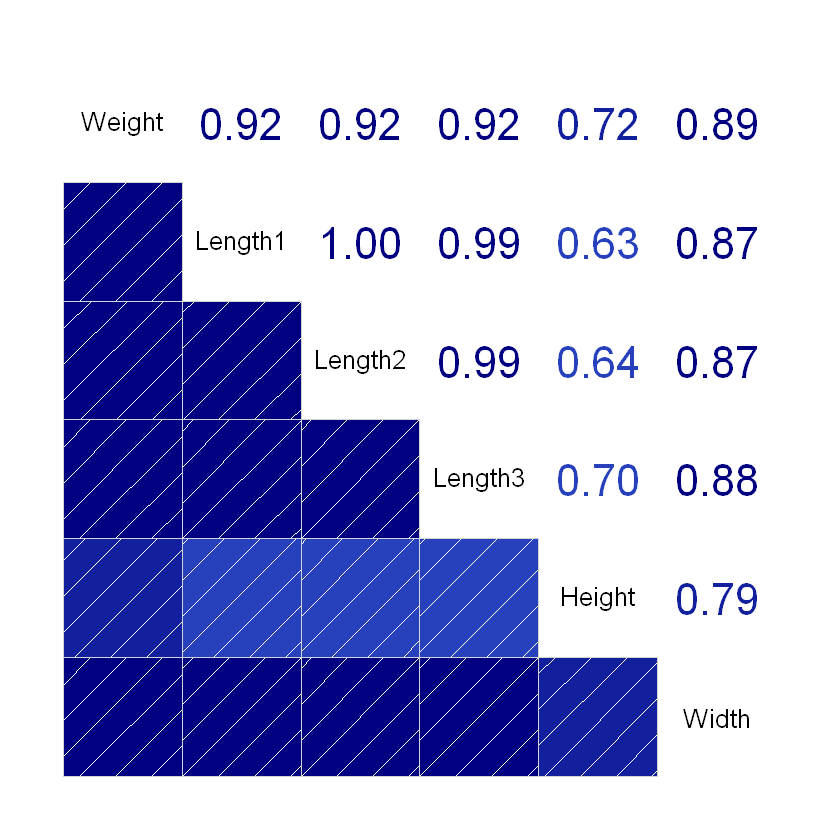

In [6]:
corrgram(df, lower.panel=panel.shade, upper.panel=panel.cor)

In [7]:
set.seed(42)
sampleSplit <- sample.split(Y=df$Weight, SplitRatio=0.7)
trainSet <- subset(x=df, sampleSplit==TRUE)
testSet <- subset(x=df, sampleSplit==FALSE)

In [8]:
model <- lm(formula=Weight ~ ., data=trainSet)

In [9]:
summary(model)


Call:
lm(formula = Weight ~ ., data = trainSet)

Residuals:
    Min      1Q  Median      3Q     Max 
-215.89  -54.61   -5.17   43.84  398.39 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -906.264    163.753  -5.534 2.56e-07 ***
SpeciesParkki     119.896     92.780   1.292   0.1993    
SpeciesPerch      163.519    152.037   1.076   0.2848    
SpeciesPike      -186.470    177.873  -1.048   0.2970    
SpeciesRoach      103.074    118.739   0.868   0.3875    
SpeciesSmelt      421.896    156.123   2.702   0.0081 ** 
SpeciesWhitefish  126.796    120.745   1.050   0.2962    
Length1           -57.474     44.056  -1.305   0.1951    
Length2            57.483     54.485   1.055   0.2940    
Length3            34.205     36.225   0.944   0.3473    
Height              8.176     16.539   0.494   0.6222    
Width             -14.080     31.333  -0.449   0.6541    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard er

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



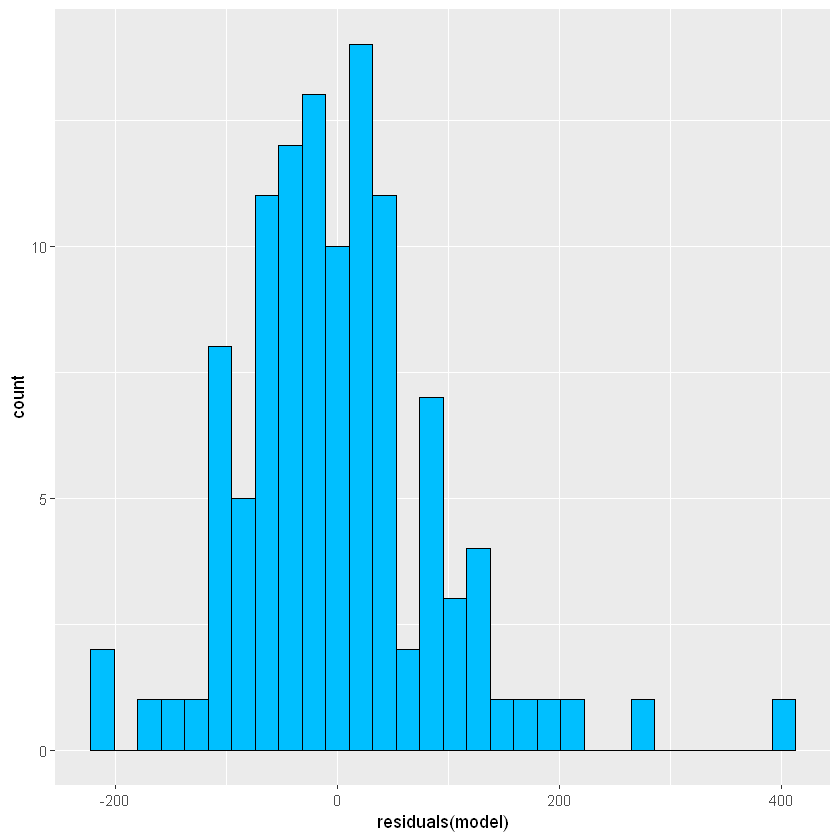

In [10]:
modelResiduals <- as.data.frame(residuals(model)) 
ggplot(modelResiduals, aes(residuals(model))) +
geom_histogram(fill='deepskyblue', color='black')

In [11]:
preds <- predict(model, testSet)

In [12]:
modelEval <- cbind(testSet$Weight, preds)
colnames(modelEval) <- c('Actual', 'Predicted')
modelEval <- as.data.frame(modelEval)

In [13]:
head(modelEval)

,Actual,Predicted
,<dbl>,<dbl>
1,242,284.1470
2,290,334.7763
4,363,436.3956
7,500,482.3648
13,500,528.0177
16,600,563.5415


In [14]:
mse <- mean((modelEval$Actual - modelEval$Predicted)^2)
rmse <- sqrt(mse)

In [15]:
mse; rmse

[1] 9198.647

[1] 95.90958